In [22]:
import json
import pandas as pd
import time

In [23]:
payload_size = [1500]
circle_size = [200]
sender_type = ['sender_rdma', 'sender_rdma_write_multip_write',  'sender_rdma_write_multip_read', 'sender_rdma_write_nomultip_read', 'tcpproxy']
payload_sizes = ['10-100','100-1000','1000-10000']
simult_req = ['1','10','100']
for psize in payload_size:
    for csize in circle_size:
        for size in payload_sizes:
            for n in simult_req:
                # one xp, let's get th latencies and avg req rates
                #   CASE   OPS/SEC ...
                # sender | res1 res2 res3        
                data = []
                for sender in sender_type:
                    if sender!='tcpproxy':
                        result_json = f"results/json_{sender}_{size}_{n}_{psize}_{csize}"
                    else:
                        result_json = f"results/json_{sender}_{size}_{n}"
                    print(result_json)            
                    time.sleep(1)
                    with open(result_json, 'r') as file:
                        result =  json.load(file)                

                        result_dict = {}
                        result_dict["sender_type"] = sender
                        result_dict["Ops/sec"] = result['ALL STATS']['Totals']['Ops/sec']
                        result_dict["Average Latency"] = result['ALL STATS']['Totals']['Average Latency']
                        result_dict["p50.00"] = result['ALL STATS']['Totals']['Percentile Latencies']['p50.00']
                        result_dict["p99.00"] = result['ALL STATS']['Totals']['Percentile Latencies']['p99.00']
                        result_dict["p99.90"] = result['ALL STATS']['Totals']['Percentile Latencies']['p99.90']

                        data.append(result_dict)
                    print(result)        
                print("\n\n\n")
                df = pd.DataFrame(data)
                df.to_csv(f'res_{size}_{n}.csv')

results/json_sender_rdma_10-100_1_1500_200
{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0'

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information'

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information'

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information'

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information'

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run information

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '10:100', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informatio

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informati

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informati

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informati

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informati

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informati

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '100:1000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 1, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informat

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informa

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informa

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informa

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 10, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run informa

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run inform

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run inform

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run inform

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run inform

{'configuration': {'server': '127.0.0.1', 'port': 3001, 'unix socket': '(null)', 'address family': 'Unspecified', 'protocol': 'memcache_text', 'out_file': '(null)', 'tls': 'false', 'cert': '(null)', 'key': '(null)', 'cacert': '(null)', 'tls_skip_verify': 'false', 'sni': '(null)', 'client_stats': '(null)', 'run_count': 1, 'debug': 0, 'requests': 0, 'clients': 1, 'threads': 1, 'test_time': 120, 'ratio': '1:10', 'pipeline': 100, 'data_size': 0, 'data_offset': 0, 'random_data': 'false', 'data_size_range': '1000:10000', 'data_size_list': '', 'data_size_pattern': 'R', 'expiry_range': '0:0', 'data_import': '(null)', 'data_verify': 'false', 'verify_only': 'false', 'generate_keys': 'false', 'key_prefix': 'memtier-', 'key_minimum': 0, 'key_maximum': 10000000, 'key_pattern': 'R:R', 'key_stddev': 0.0, 'key_median': 0.0, 'reconnect_interval': 0, 'multi_key_get': 0, 'authenticate': '', 'select-db': 0, 'no-expiry': 'false', 'wait-ratio': '0:0', 'num-slaves': '0:0', 'wait-timeout': '0-0'}, 'run inform

In [24]:
result['ALL STATS']['Totals']['Ops/sec']
result['ALL STATS']['Totals']['Average Latency']
result['ALL STATS']['Totals']['Ops/sec']
result['ALL STATS']['Totals']['Percentile Latencies']['p50.00']
result['ALL STATS']['Totals']['Percentile Latencies']['p99.00']
result['ALL STATS']['Totals']['Percentile Latencies']['p99.90']

0.871

In [56]:
import matplotlib.pyplot as plt

def plot_metric_over_time_bar(time_series, metric_name, duration, y_axis_name, plot_filename):
    metric_values_over_time = []
    for t in range(duration):
        metric_values_over_time.append(time_series[str(t)][metric_name])

    plt.clf()
    plt.bar(range(duration), metric_values_over_time)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel(y_axis_name, fontsize=12)
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.title(f'{y_axis_name} over Time', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"plots/{plot_filename}.svg")
    

def plot_metric_over_time_line(time_series, metric_name, duration, y_axis_name, plot_filename):
    metric_values_over_time = []
    for t in range(duration):
        metric_values_over_time.append(time_series[str(t)][metric_name])

    plt.clf()
    plt.plot(range(duration), metric_values_over_time)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel(y_axis_name, fontsize=12)
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.title(f'{y_axis_name} over Time', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"plots/{plot_filename}.svg")
    
def plot_metric_over_time_line_all_proto(metric_name, duration, y_axis_name, size, n, maxy=None,psize=1500, csize=200):
    plot_filename=f'{size}_{n}_{metric_name}'
    plt.clf()
    for sender in sender_type:
        if sender!='tcpproxy':
            result_json = f"results/json_{sender}_{size}_{n}_{psize}_{csize}"
        else:
            result_json = f"results/json_{sender}_{size}_{n}"
        print(result_json)
        with open(result_json, 'r') as file:
            result =  json.load(file)        

        duration = result['configuration']['test_time']
        time_series = result['ALL STATS']['Totals']['Time-Serie']

        metric_values_over_time = []
        for t in range(duration):
            metric_values_over_time.append(time_series[str(t)][metric_name])

        plt.plot(range(duration), metric_values_over_time, label=names[sender])

    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel(y_axis_name, fontsize=12)
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10)
    if maxy is not None:
        plt.ylim(0, maxy)
    plt.title(f'{y_axis_name} over Time', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right',prop={'size': 7})  # Add legend to distinguish different plots
    plt.subplots_adjust(right=0.7)
    #plt.show()  # Show the plot after all lines have been added

    #plt.tight_layout()
    plt.savefig(f"plots/agg_timeseries_{plot_filename}.svg")




results/json_sender_rdma_10-100_1_1500_200
results/json_sender_rdma_write_multip_write_10-100_1_1500_200
results/json_sender_rdma_write_multip_read_10-100_1_1500_200
results/json_sender_rdma_write_nomultip_read_10-100_1_1500_200
results/json_tcpproxy_10-100_1
results/json_sender_rdma_10-100_1_1500_200
results/json_sender_rdma_write_multip_write_10-100_1_1500_200
results/json_sender_rdma_write_multip_read_10-100_1_1500_200
results/json_sender_rdma_write_nomultip_read_10-100_1_1500_200
results/json_tcpproxy_10-100_1
results/json_sender_rdma_10-100_1_1500_200
results/json_sender_rdma_write_multip_write_10-100_1_1500_200
results/json_sender_rdma_write_multip_read_10-100_1_1500_200
results/json_sender_rdma_write_nomultip_read_10-100_1_1500_200
results/json_tcpproxy_10-100_1
results/json_sender_rdma_10-100_1_1500_200
results/json_sender_rdma_write_multip_write_10-100_1_1500_200
results/json_sender_rdma_write_multip_read_10-100_1_1500_200
results/json_sender_rdma_write_nomultip_read_10-100_1_

results/json_sender_rdma_write_multip_write_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_read_1000-10000_1_1500_200
results/json_sender_rdma_write_nomultip_read_1000-10000_1_1500_200
results/json_tcpproxy_1000-10000_1
results/json_sender_rdma_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_write_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_read_1000-10000_1_1500_200
results/json_sender_rdma_write_nomultip_read_1000-10000_1_1500_200
results/json_tcpproxy_1000-10000_1
results/json_sender_rdma_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_write_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_read_1000-10000_1_1500_200
results/json_sender_rdma_write_nomultip_read_1000-10000_1_1500_200
results/json_tcpproxy_1000-10000_1
results/json_sender_rdma_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_write_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_read_1000-10000_1_1500_200
results/json_sender_rdma_writ

KeyError: '0'

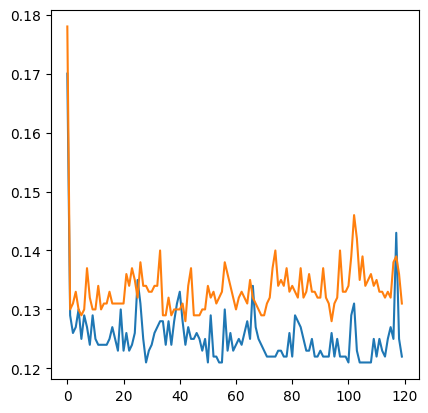

In [57]:
names = {'sender_rdma':'dummy SEND/RECV', 
         'sender_rdma_write_multip_write':'WRITE SYNC WRITE',  
         'sender_rdma_write_multip_read':'WRITE SYNC READ', 
         'sender_rdma_write_nomultip_read':'WRITE NOSYNC WRITE', 'tcpproxy':'ENVOY TCP'}
for size in payload_sizes:
    for n in simult_req: 
        plot_metric_over_time_line_all_proto('Average Latency', duration, f'Average Latency over time  ({size};{n})', size, n)
        plot_metric_over_time_line_all_proto('p99.90', duration, f'p99.90 over time ({size};{n})', size, n)
        plot_metric_over_time_line_all_proto('p99.00', duration, f'p99.00 over time ({size};{n})', size, n)
        plot_metric_over_time_line_all_proto('p50.00', duration, f'p50 over time ({size};{n})', size, n)
        plot_metric_over_time_line_all_proto('Max Latency', duration, f'Max Latency over time ({size};{n})', size, n, 2)


results/json_sender_rdma_10-100_1_1500_200
results/json_sender_rdma_write_multip_write_10-100_1_1500_200
results/json_tcpproxy_10-100_1
results/json_sender_rdma_10-100_10_1500_200
results/json_sender_rdma_write_multip_write_10-100_10_1500_200
results/json_tcpproxy_10-100_10
results/json_sender_rdma_10-100_100_1500_200
results/json_sender_rdma_write_multip_write_10-100_100_1500_200
results/json_tcpproxy_10-100_100
results/json_sender_rdma_100-1000_1_1500_200
results/json_sender_rdma_write_multip_write_100-1000_1_1500_200
results/json_tcpproxy_100-1000_1
results/json_sender_rdma_100-1000_10_1500_200
results/json_sender_rdma_write_multip_write_100-1000_10_1500_200
results/json_tcpproxy_100-1000_10
results/json_sender_rdma_100-1000_100_1500_200
results/json_sender_rdma_write_multip_write_100-1000_100_1500_200
results/json_tcpproxy_100-1000_100
results/json_sender_rdma_1000-10000_1_1500_200
results/json_sender_rdma_write_multip_write_1000-10000_1_1500_200
results/json_tcpproxy_1000-10000_1


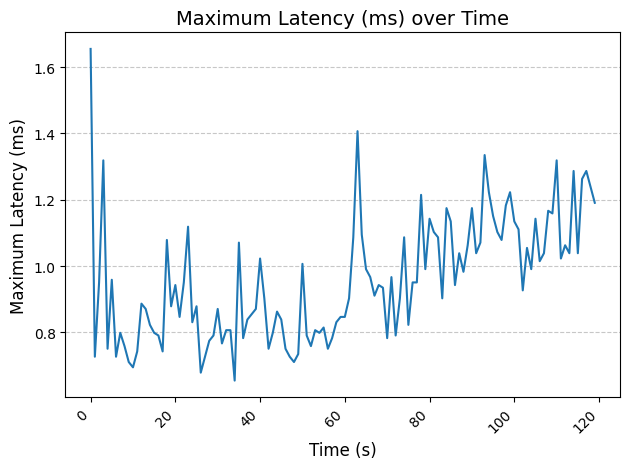

In [11]:

# Generate plots for all json
payload_size = [1500]
circle_size = [200]
sender_type = ['sender_rdma', 'sender_rdma_write_multip_write', 'tcpproxy']
payload_sizes = ['10-100','100-1000','1000-10000']
simult_req = ['1','10','100']
for psize in payload_size:
    for csize in circle_size:
        for size in payload_sizes:
            for n in simult_req:     
                data = []
                for sender in sender_type:
                    if sender!='tcpproxy':
                        result_json = f"results/json_{sender}_{size}_{n}_{psize}_{csize}"
                    else:
                        result_json = f"results/json_{sender}_{size}_{n}"
                    print(result_json)
                    with open(result_json, 'r') as file:
                        result =  json.load(file)        

                    duration = result['configuration']['test_time']
                    time_series = result['ALL STATS']['Totals']['Time-Serie']

                    plot_metric_over_time_line(time_series=time_series, metric_name='p99.90', duration=duration, y_axis_name='p99.90 Latency (ms)', plot_filename=f'{sender}_{size}_{n}_p99.90')
                    plot_metric_over_time_line(time_series=time_series, metric_name='p99.00', duration=duration, y_axis_name='p99.00 Latency (ms)', plot_filename=f'{sender}_{size}_{n}_p99.00')
                    plot_metric_over_time_line(time_series=time_series, metric_name='p50.00', duration=duration, y_axis_name='p50.00 Latency (ms)', plot_filename=f'{sender}_{size}_{n}_p50.00')
                    plot_metric_over_time_line(time_series=time_series, metric_name='Average Latency', duration=duration, y_axis_name='Average Latency (ms)', plot_filename=f'{sender}_{size}_{n}_avg_latency')
                    plot_metric_over_time_line(time_series=time_series, metric_name='Count', duration=duration, y_axis_name='Count', plot_filename=f'{sender}_{size}_{n}_count')
                    plot_metric_over_time_line(time_series=time_series, metric_name='Max Latency', duration=duration, y_axis_name='Maximum Latency (ms)', plot_filename=f'{sender}_{size}_{n}_max_latency')

In [ ]:

# Generate plots for individual json
result_json = f"results/json_rdma_sender_10-100_1"
print(result_json)          

duration = result['configuration']['test_time']
plot_metric_over_time(time_series=time_series, metric_name='p99.90', duration=duration, y_axis_name='p99.90 Latency (ms)', plot_filename=f'{sender}_{size}_{n}_p99.90')
plot_metric_over_time(time_series=time_series, metric_name='p99.00', duration=duration, y_axis_name='p99.00 Latency (ms)', plot_filename=f'{sender}_{size}_{n}_p99.00')
plot_metric_over_time(time_series=time_series, metric_name='p50.00', duration=duration, y_axis_name='p50.00 Latency (ms)', plot_filename=f'{sender}_{size}_{n}_p50.00')
plot_metric_over_time(time_series=time_series, metric_name='Average Latency', duration=duration, y_axis_name='Average Latency (ms)', plot_filename=f'{sender}_{size}_{n}_avg_latency')
plot_metric_over_time(time_series=time_series, metric_name='Count', duration=duration, y_axis_name='Count', plot_filename=f'{sender}_{size}_{n}_count')
plot_metric_over_time(time_series=time_series, metric_name='Max Latency', duration=duration, y_axis_name='Maximum Latency (ms)', plot_filename=f'{sender}_{size}_{n}_max_latency')